In [1]:
import urllib.request
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def main():
    doi = "10.1371/journal.pcbi.1004668"
    list_dois = get_dois(doi)
    draw_graph(doi, list_dois)

In [3]:
def get_dois(doi):
    url = "https://api.crossref.org/works/"
    doi_json_data = urllib.request.urlopen(url + doi)
    doi_json_data_content = doi_json_data.read()
    doi_data = json.loads(doi_json_data_content)
    ref_dois_lst = []
    for reference in doi_data["message"]["reference"]:
        try:
            ref_dois_lst.append(reference["DOI"])
        except KeyError:
            pass
    return ref_dois_lst

In [10]:
def draw_graph(doi, list_dois):
    G = nx.Graph()
    G.add_nodes_from(list_dois)
    for ref_dois in list_dois:
        G.add_edge(doi, ref_dois)
        try:
            for more_ref in get_dois(ref_dois):
                G.add_edge(ref_dois, more_ref)
        except KeyError:
            pass
        try:
            for even_more_ref in get_dois(more_ref):
                G.add_edge(more_ref, even_more_ref)
        except KeyError:
            pass
            
    nx.draw(G)
    plt.show()

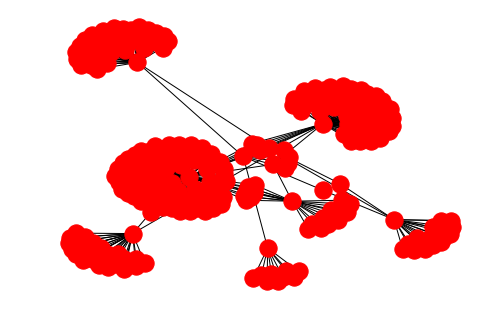

In [12]:
main()